In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

import seaborn as sns
from lutils.stock import lstock
from statsmodels.tsa.arima_model import ARIMA

from arch import arch_model
from arch.unitroot import ADF

In [44]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)

In [2]:
%matplotlib inline

In [3]:
stock = lstock.get_stock('/home/left5/datas/002108.h5') # 603858

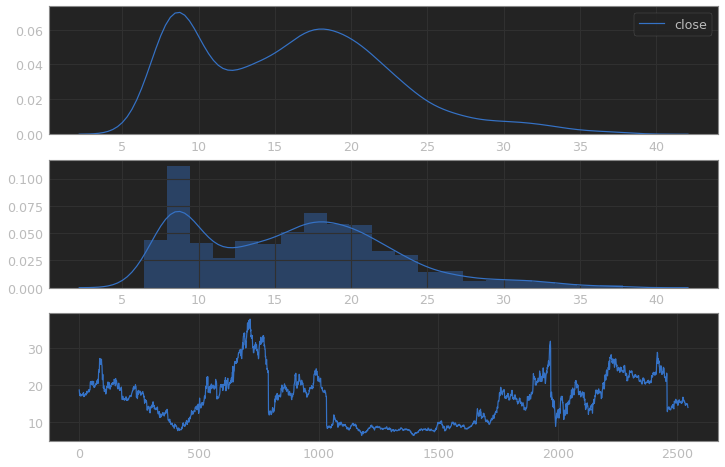

In [82]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(311)
sns.kdeplot(stock['close'], ax=ax1)
ax2 = fig.add_subplot(312)
sns.distplot(stock['close'].values, ax=ax2, label='close')
ax3 = fig.add_subplot(313)
ax3.plot(stock['close'].values)

### arma

In [5]:
print sm.datasets.sunspots.NOTE

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [6]:
dta = sm.datasets.sunspots.load_pandas().data

In [7]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta['YEAR']

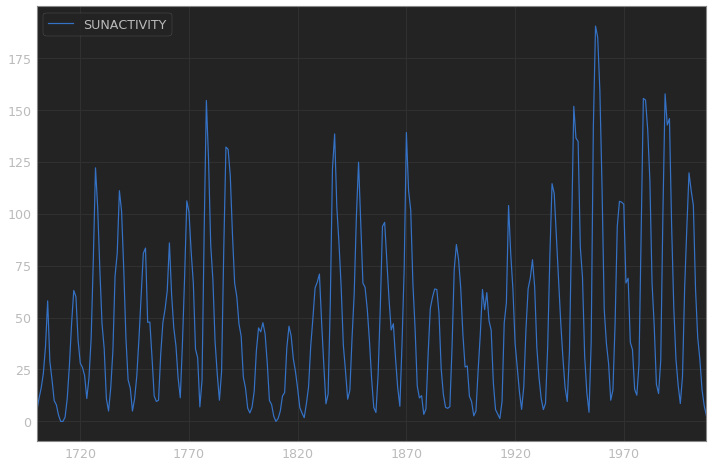

In [8]:
dta.plot(figsize=(12, 8))

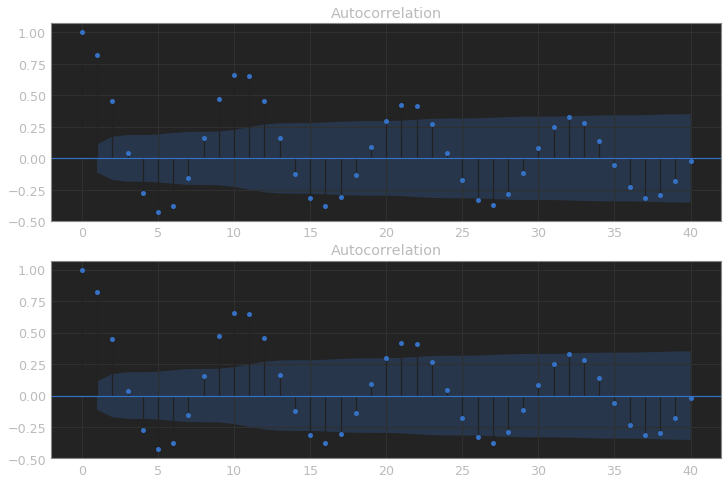

In [9]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(dta, lags=40, ax=ax2)

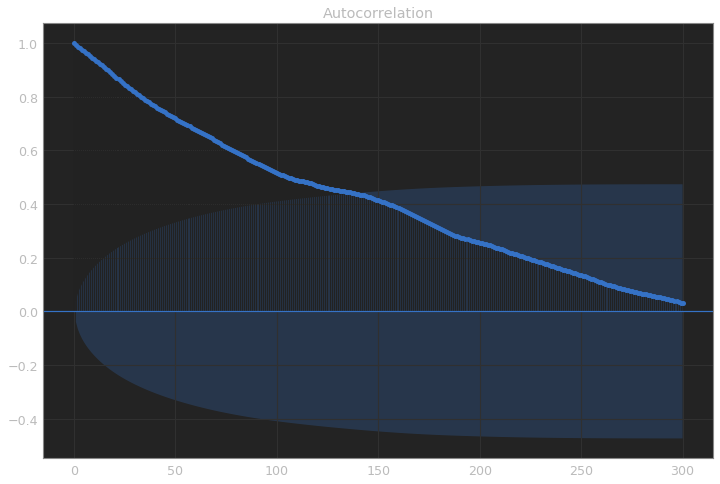

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(stock['close'].values.squeeze(), lags=300, ax=ax)

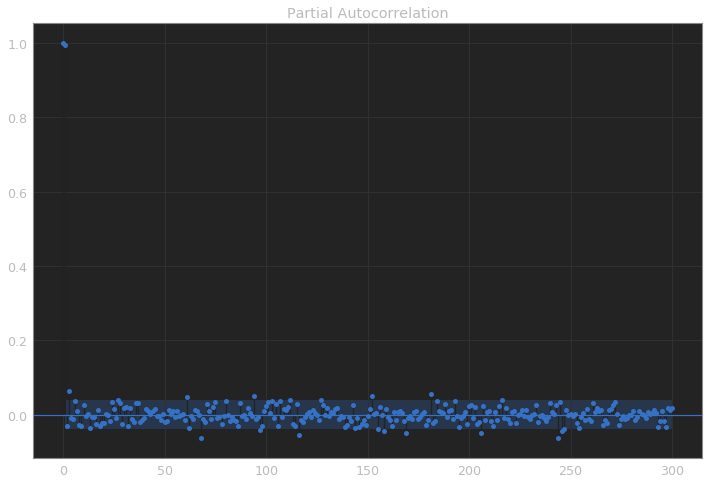

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(stock['close'].values.squeeze(), lags=300, ax=ax)

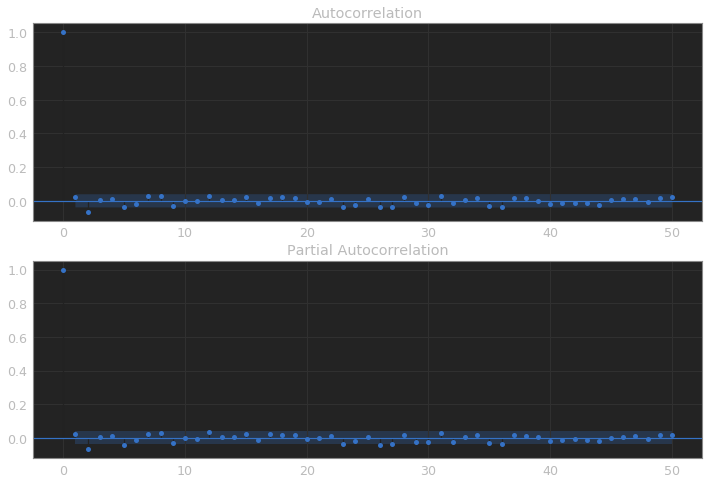

In [12]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
# plt.plot(stock['close'].values - np.roll(stock['close'].values, 1))
fig = sm.graphics.tsa.plot_acf(stock['close'].values - np.roll(stock['close'].values, 1), lags=50, ax=ax1)

ax1 = fig.add_subplot(212)
# plt.plot(stock['close'].values - np.roll(stock['close'].values, 1))
fig = sm.graphics.tsa.plot_pacf(stock['close'].values - np.roll(stock['close'].values, 1), lags=50, ax=ax1)

In [13]:
model = ARIMA(stock['close'].values, order=(2, 1, 2))

In [14]:
close_fit = model.fit(disp=1)

In [15]:
df = pd.DataFrame(stock['close'].values)
diff = df - df.shift()

In [30]:
plt.plot?

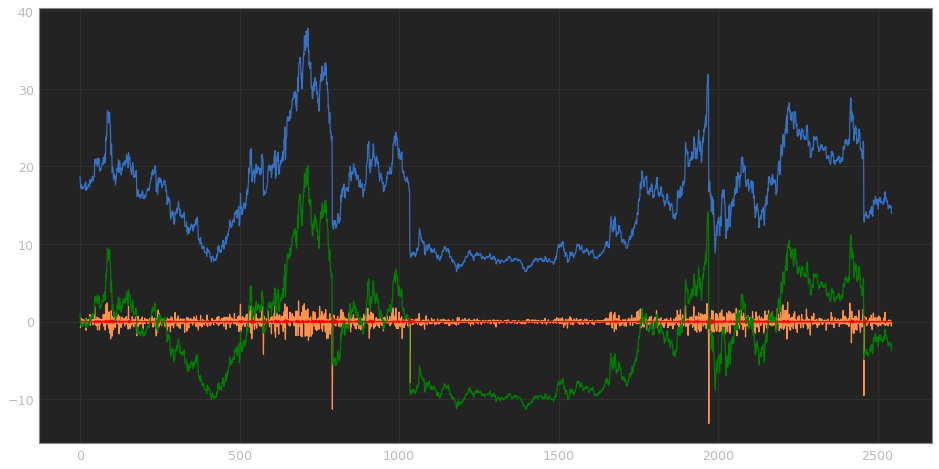

In [32]:
plt.figure(figsize=(16, 8))
# plt.plot(stock['close'].values)
plt.plot(stock['close'].values)
plt.plot(diff, color='y')
plt.plot(close_fit.fittedvalues, color='red')
plt.plot(res.resid.values, color='green')

/usr/local/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


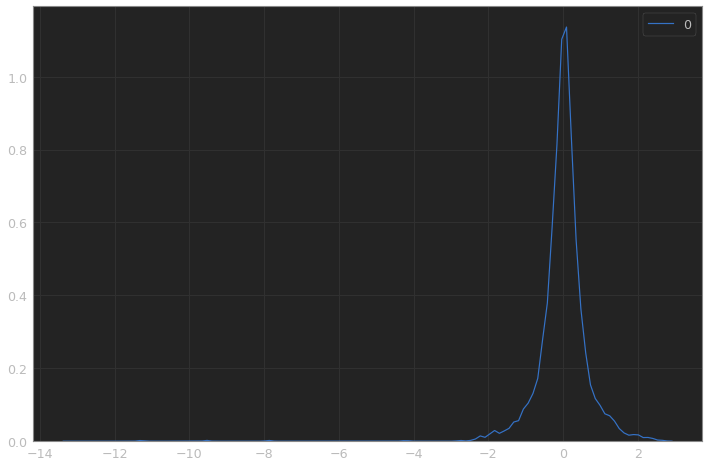

In [17]:
#diff[diff.isnull()] = 0
#diff[0]
plt.figure(figsize=(12, 8))
sns.kdeplot(diff[0])

In [38]:
am = arch_model(stock['close'].values)
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7448.13680027
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7400.11057595
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7329.09528812
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7323.57479849
Iteration:      5,   Func. Count:     36,   Neg. LLF: 7277.92980148
Iteration:      6,   Func. Count:     43,   Neg. LLF: 7238.48425539
Iteration:      7,   Func. Count:     50,   Neg. LLF: 7215.9904168
Iteration:      8,   Func. Count:     57,   Neg. LLF: 7203.62922526
Iteration:      9,   Func. Count:     64,   Neg. LLF: 7197.12714719
Iteration:     10,   Func. Count:     71,   Neg. LLF: 7185.20032753
Iteration:     11,   Func. Count:     78,   Neg. LLF: 7179.44397189
Iteration:     12,   Func. Count:     85,   Neg. LLF: 7174.54557488
Iteration:     13,   Func. Count:     91,   Neg. LLF: 7157.6574777
Iteration:     14,   Func. Count:     98,   Neg. LLF: 7155.47530781
Iteration:     15,   Func. Count:    105,   Neg. L

In [39]:
res

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.062
Mean Model:             Constant Mean   Adj. R-squared:                 -0.062
Vol Model:                      GARCH   Log-Likelihood:               -7154.14
Distribution:                  Normal   AIC:                           14316.3
Method:            Maximum Likelihood   BIC:                           14339.7
                                        No. Observations:                 2545
Date:                Sat, Oct 21 2017   Df Residuals:                     2541
Time:                        11:12:02   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            17.7005      0.190     93.175      0.000 [ 17.328, 18.07

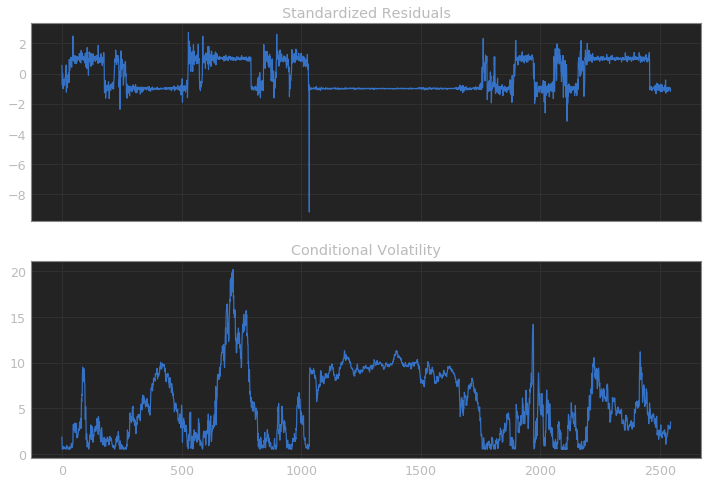

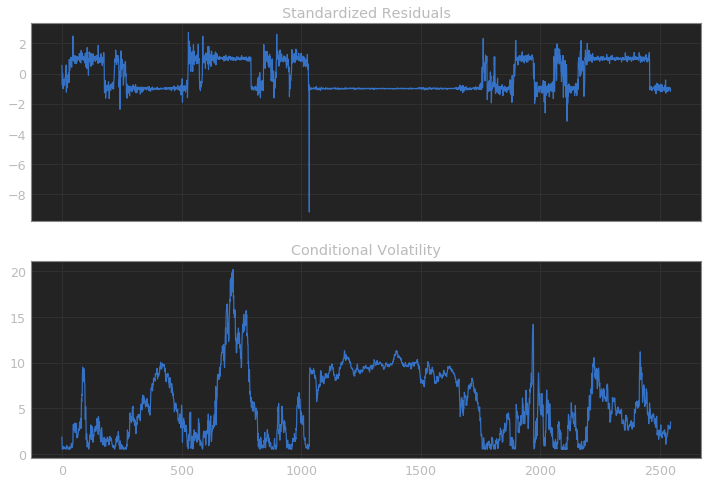

In [45]:
res.plot()

In [72]:
diff_values = np.nan_to_num(diff.values).reshape([-1])

In [73]:
diff_values.shape

(2545,)

In [80]:
# adf = ADF(stock['close'].values, lags=5)
adf = ADF(diff_values, lags=5)
print adf.summary().as_text()

   Augmented Dickey-Fuller Results   
Test Statistic                -21.681
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
